# Skin Lesion Predictor

The data set was taken from: https://www.kaggle.com/kmader/skin-cancer-mnist-ham10000
This model classifies skin lesions into seven classes. The main challenges were the unbalanced dataset.

What is the objective?
Create a tool that can tell doctors and lab technologists the highest probability diagnoses for a given skin lesion. 
This will help them quickly identify high priority patients and speed up their workflow. 


### Libraries

In [1]:
from PIL import Image
from sklearn.preprocessing import StandardScaler
import os
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from skimage import io

### Processing Data

In [2]:
#read the spreadsheet file
df = pd.read_csv('skincancer/HAM10000_metadata.csv')

In [3]:
#an overview of what the data looks like
df.head()

,lesion_id,image_id,dx,dx_type,age,sex,localization
0,HAM_0000118,ISIC_0027419,bkl,histo,80.0,male,scalp
1,HAM_0000118,ISIC_0025030,bkl,histo,80.0,male,scalp
2,HAM_0002730,ISIC_0026769,bkl,histo,80.0,male,scalp
3,HAM_0002730,ISIC_0025661,bkl,histo,80.0,male,scalp
4,HAM_0001466,ISIC_0031633,bkl,histo,75.0,male,ear


In [4]:
# Create a dictionary for different legion types
lesion_type = {'bcc': 'Basal cell carcinoma', 
               'nv': 'Melanocytic nevi',
               'mel': 'Melanoma', 
               'vasc': 'Vascular lesions',
               'bkl': 'Benign keratosis-like lesions ',
               'df': 'Dermatofibroma',
               'akiec': 'Actinic keratoses'}

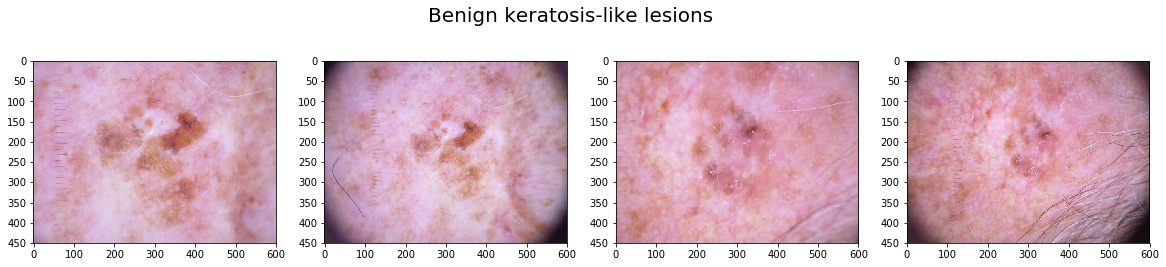

In [5]:
f, (ax0, ax1, ax2, ax3) = plt.subplots(1,4, figsize= (20,12))
image = io.imread("skincancer/ISIC_0027419.jpg")
ax0.imshow(image)
image = io.imread("skincancer/ISIC_0025030.jpg")
ax1.imshow(image)
image = io.imread("skincancer/ISIC_0026769.jpg")
ax2.imshow(image)
image = io.imread("skincancer/ISIC_0025661.jpg")
ax3.imshow(image)
plt.suptitle(lesion_type['bkl'], fontsize=20)
plt.subplots_adjust(top=1.5)
plt.show()

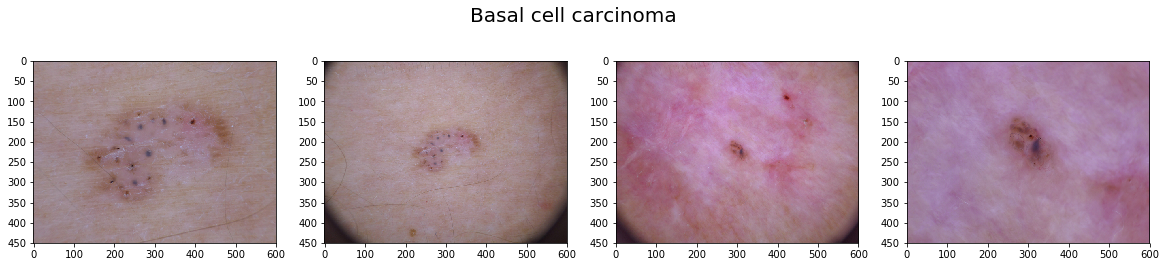

In [6]:
f, (ax0, ax1, ax2, ax3) = plt.subplots(1,4, figsize= (20,12))
image = io.imread("skincancer/ISIC_0030335.jpg") 
ax0.imshow(image)
image = io.imread("skincancer/ISIC_0025793.jpg")
ax1.imshow(image)
image = io.imread("skincancer/ISIC_0025731.jpg")
ax2.imshow(image)
image = io.imread("skincancer/ISIC_0028670.jpg")
ax3.imshow(image)
plt.suptitle(lesion_type['bcc'], fontsize=20)
plt.subplots_adjust(top=1.5)
plt.show()

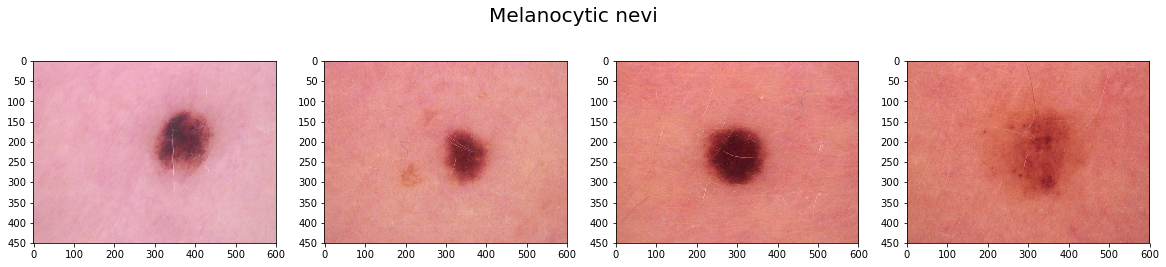

In [7]:
f, (ax0, ax1, ax2, ax3) = plt.subplots(1,4, figsize= (20,12))
image = io.imread("skincancer/ISIC_0030102.jpg")
ax0.imshow(image)
image = io.imread("skincancer/ISIC_0029526.jpg")
ax1.imshow(image)
image = io.imread("skincancer/ISIC_0028446.jpg")
ax2.imshow(image)
image = io.imread("skincancer/ISIC_0031486.jpg")
ax3.imshow(image)
plt.suptitle(lesion_type['nv'], fontsize=20)
plt.subplots_adjust(top=1.5)
plt.show()

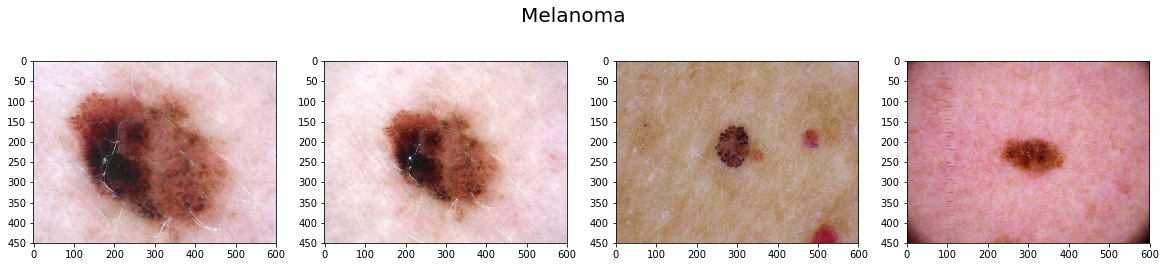

In [8]:
f, (ax0, ax1, ax2, ax3) = plt.subplots(1,4, figsize= (20,12))
image = io.imread("skincancer/ISIC_0032985.jpg")
ax0.imshow(image)
image = io.imread("skincancer/ISIC_0033232.jpg")
ax1.imshow(image)
image = io.imread("skincancer/ISIC_0032258.jpg")
ax2.imshow(image)
image = io.imread("skincancer/ISIC_0027076.jpg")
ax3.imshow(image)
plt.suptitle(lesion_type["mel"], fontsize=20)
plt.subplots_adjust(top=1.5)
plt.show()

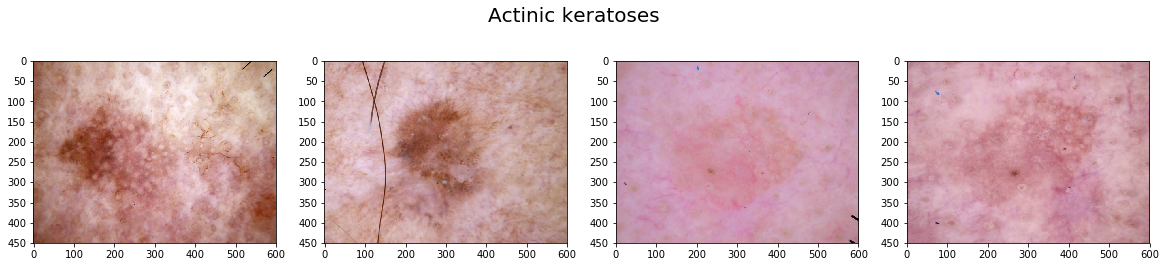

In [9]:
f, (ax0, ax1, ax2, ax3) = plt.subplots(1,4, figsize= (20,12))
image = io.imread("skincancer/ISIC_0029634.jpg")
ax0.imshow(image)
image = io.imread("skincancer/ISIC_0031918.jpg")
ax1.imshow(image)
image = io.imread("skincancer/ISIC_0025831.jpg")
ax2.imshow(image)
image = io.imread("skincancer/ISIC_0030803.jpg")
ax3.imshow(image)
plt.suptitle(lesion_type['akiec'], fontsize=20)
plt.subplots_adjust(top=1.5)
plt.show()

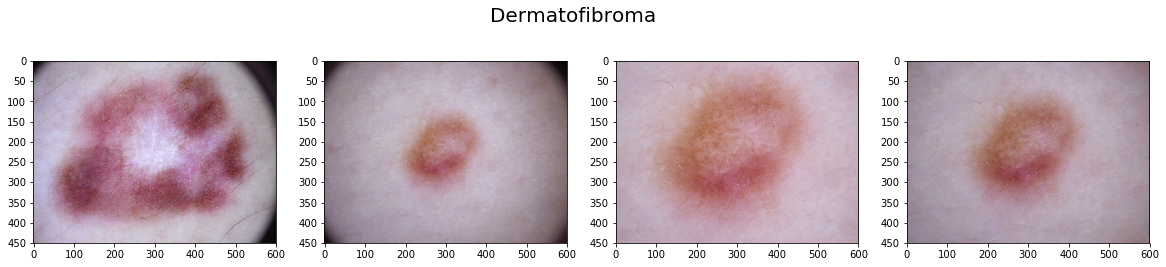

In [10]:
f, (ax0, ax1, ax2, ax3) = plt.subplots(1,4, figsize= (20,12))
image = io.imread("skincancer/ISIC_0033256.jpg")
ax0.imshow(image)
image = io.imread("skincancer/ISIC_0034135.jpg")
ax1.imshow(image)
image = io.imread("skincancer/ISIC_0033780.jpg")
ax2.imshow(image)
image = io.imread("skincancer/ISIC_0033626.jpg")
ax3.imshow(image)
plt.suptitle(lesion_type['df'], fontsize=20)
plt.subplots_adjust(top=1.5)
plt.show()

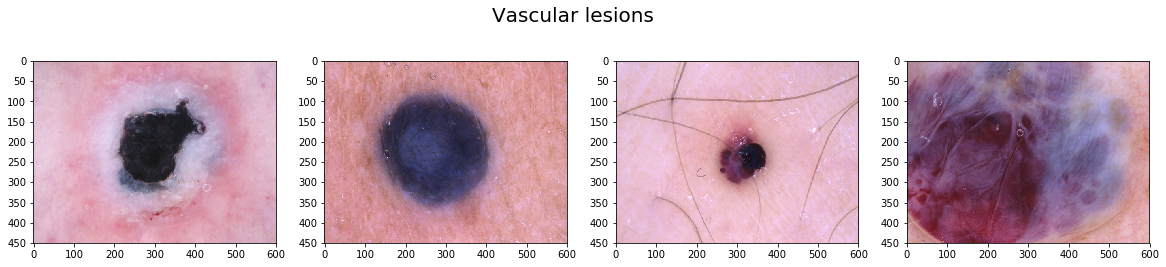

In [11]:
f, (ax0, ax1, ax2, ax3) = plt.subplots(1,4, figsize= (20,12))
image = io.imread("skincancer/ISIC_0034196.jpg")
ax0.imshow(image)
image = io.imread("skincancer/ISIC_0032270.jpg")
ax1.imshow(image)
image = io.imread("skincancer/ISIC_0031950.jpg")
ax2.imshow(image)
image = io.imread("skincancer/ISIC_0031090.jpg")
ax3.imshow(image)
plt.suptitle(lesion_type['vasc'], fontsize=20)
plt.subplots_adjust(top=1.5)
plt.show()

### Visualizing Data

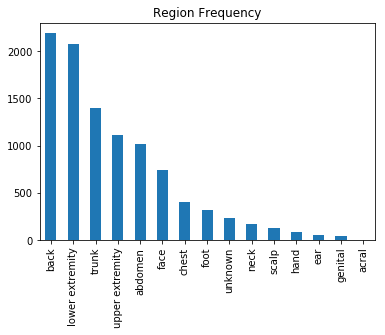

In [12]:
#plot the localization of lesions
a = df.loc[:, 'localization'].value_counts().plot(kind='bar', title='Region Frequency') 
a

Text(0.5, 1.0, 'Lesion Type')

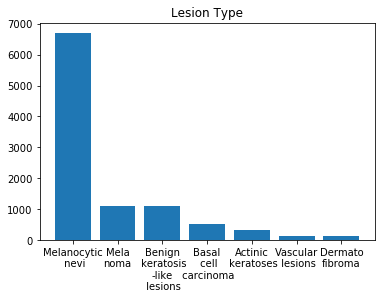

In [13]:
#plot the types of lesions
dx_counts = df.loc[:, 'dx'].value_counts() #see how many images we have on each lesion
plt.bar([ 'Melanocytic\n nevi', 'Mela\nnoma', 'Benign\n keratosis\n-like\n lesions',
         'Basal\n cell\n carcinoma', 'Actinic\n keratoses', 'Vascular\n lesions', 
         'Dermato\nfibroma'], dx_counts)
plt.title('Lesion Type')

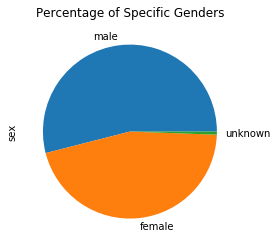

In [14]:
#plot the sex of the research subjects
df.loc[:, 'sex'].value_counts().plot(kind='pie', title='Percentage of Specific Genders')

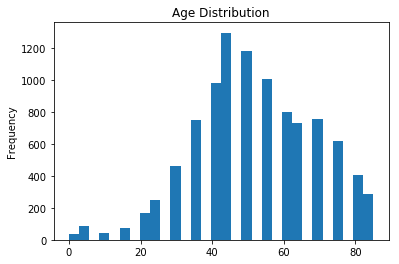

In [15]:
#plot the different age groups present within the dataset
df.loc[:, 'age'].plot(kind='hist', bins=30, title='Age Distribution')

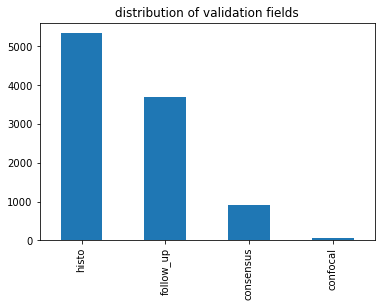

In [16]:
# plot technical Validation field to see the distribution of histopathology, confocal, follow-up, consensus
df.loc[:, 'dx_type'].value_counts().plot(kind='bar', title='distribution of validation fields')

### Prepare Data

In [17]:
def load_image( infilename ) :
    """
    Load image from data file, coverts it to numpy array with RGB values and returns the array
    """
    img = Image.open( infilename )
    img.load()
    data = np.asarray( img, dtype="int32" ) 
    return data

In [18]:
#if RGB values of image are in csv file
try:
    data = pd.read_csv('skincancer/hmnist_8_8_RGB.csv').values #read RGB values from csv file
    labels = data[:, -1] #labels will contain the types of lesion
    images = data[:, :-1] #images will contain the the images
    train = range(int(labels.shape[0] * 0.9)) #training set is 90% of data
    test = list(set(range(labels.shape[0])) - set(train)) #rest is test set
    
#if RGB values aren't in csv file, extract the values manually
except:
    data_file = 'skincancer'
    files = os.listdir(data_file)
    image_files = [i for i in files if 'jpg' in i] #list containing all image files present
    size = 16

    image_data = np.zeros((len(image_files), size * size * 3)) #matrix that will contain the RGB values of each pixel of each image
    labels = np.zeros((len(image_files),)) #matrix that will contain all the lesion types
    for (i,img_f) in enumerate(image_files): #resize images to have a conform data set, then flatten to a single column matrix
        image_data[i] = np.resize(load_image(data_file+'/'+img_f), (size,size,3)).flatten()
    locs = list(set(df.loc[:, 'dx'])) #contains the lesion labels
    for i in range(len(df.loc[:, 'dx'])): 
        labels[i] = locs.index(df.loc[:, 'dx'][i])

### Building Prediction Models

##### Random Forest Model

In [20]:
from sklearn.ensemble import RandomForestClassifier

clf = RandomForestClassifier(n_estimators=1000)
clf = clf.fit(images[train], labels[train])
print("Score : " + str(clf.score(images[test], labels[test])))

Score : 0.5718562874251497


##### Logistic regression model

In [21]:
from sklearn.linear_model import LogisticRegression
clf = LogisticRegression(solver='lbfgs', penalty='l2',
                         multi_class='multinomial').fit(images[train], labels[train])
print("Score : " + str(clf.score(images[test], labels[test])))

Score : 0.56187624750499


C:\Users\Khaled Jedoui\.julia\v0.6\Conda\deps\usr\lib\site-packages\sklearn\linear_model\logistic.py:947: ConvergenceWarning: lbfgs failed to converge. Increase the number of iterations.
  "of iterations.", ConvergenceWarning)


##### Support vector classifier model

In [22]:
from sklearn.svm import SVC
clf = SVC(gamma='auto')
clf = clf.fit(images[train], labels[train])
print("Score : " + str(clf.score(images[test], labels[test])))

Score : 0.6696606786427146


### Prediction

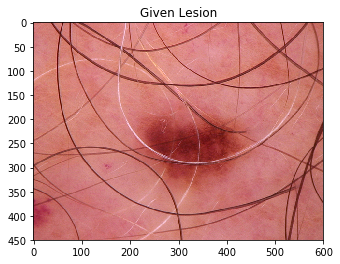

predicted lesion is:  4
Correct Lesion is:  4


In [23]:
data_file = 'skincancer'
files = os.listdir(data_file)
image_files = [i for i in files if 'jpg' in i]
idx = np.random.choice(len(image_files), 1)[0]

img_file = data_file+'/'+image_files[idx]
size = 8
image = load_image(img_file)
plt.imshow(image)
plt.title('Given Lesion')
plt.show()
image = np.resize(load_image(img_file), (size,size,3))
print('predicted lesion is: ', clf.predict(image.reshape(1, -1))[0])
print('Correct Lesion is: ', labels[idx])